In [1]:
import json
import requests
import citipy
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

api_key = "d3e324f57e32b7cf1ca934b35055e7af"
weather_url = "https://api.openweathermap.org/data/2.5/weather?appid=" + api_key +"&units=imperial"

In [2]:
cities_list = pd.read_csv("worldcities.csv")
cities_sample = cities_list.sample(500)
test = requests.get(weather_url + "&q=passaic,us").json()

#lat, lng
#temp in F ['main']['temp'] 
#humidity(%) ['main']['humidity'] 
#cloudiness(%),  ['clouds']['all']
#wind speed(mph) ['wind']['speed']
#cities_sample['Temperature (F)'], cities_sample['Humidity (%)'], cities_sample['Cloudiness (%)'], cities_sample['Wind Speed (mph)'] = "", "", "", ""
cities_sample.head()

,Country,City,Latitude,Longitude
17192,in,belluru,12.991111,76.744444
26563,pa,tocumen,9.083333,-79.383333
36613,ru,krasnyy kommunar,51.964356,55.366800
24473,mx,san quintin,30.483333,-115.950000
17179,in,bedi,22.500000,70.050000


In [3]:
for index, row in cities_sample.iterrows():
    city = row['City'].title()
    country = row['Country'].upper()
    results = requests.get(weather_url + "&q=" + city + "," + country).json()
    #print(f"Getting Weather Info from {city.title()} {index}, {country.upper()}.")
    
    try:
        cities_sample.loc[index, 'City'] = city
        cities_sample.loc[index, 'Country'] = country
        cities_sample.loc[index, 'Temperature (F)'] = results['main']['temp']
        cities_sample.loc[index, 'Humidity (%)'] = results['main']['humidity']
        cities_sample.loc[index, 'Cloudiness (%)'] = results['clouds']['all']
        cities_sample.loc[index, 'Wind Speed (mph)'] = results['wind']['speed']
    except:
        print(f"No Weather Info for {city} {index}, {country}")

No Weather Info for Tayibe 16812, IL
No Weather Info for Timbakion 14303, GR
No Weather Info for Meilu 6199, CN
No Weather Info for Sotara 7412, CO
No Weather Info for Houlung 40781, TW
No Weather Info for Alimanguan 27001, PH
No Weather Info for Athira 13453, GR
No Weather Info for New Guinlo 29247, PH
No Weather Info for Alele 46462, WF
No Weather Info for Erithrai 13541, GR
No Weather Info for Anar Darreh 11, AF
No Weather Info for Tambulan 30401, PH
No Weather Info for Razdolnoye 41656, UA
No Weather Info for Giengen 8900, DE
No Weather Info for Uroteppa 40393, TJ
No Weather Info for Gurskoye 35967, RU
No Weather Info for Timbangan 30494, PH
No Weather Info for Kuanshan 40797, TW
No Weather Info for Pate 40808, TW
No Weather Info for Santa Cruz De Rosales 24490, MX
No Weather Info for Donja Vrezina 34866, RS
No Weather Info for Bolsheustikinskoye 35464, RU
No Weather Info for Tavai 32014, PY
No Weather Info for Kaimur 18061, IN
No Weather Info for Kaspican 1970, BG
No Weather Info 

In [4]:
cities_sample = cities_sample.dropna()

Using this plot, we can see that the closer you get towards the Equator, it gets hotter


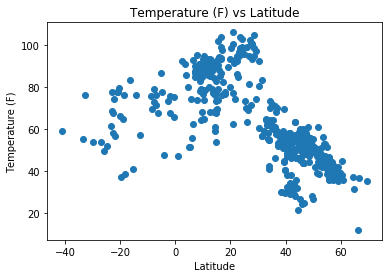

In [29]:
#Temperature vs Latitude Scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Temperature (F)'])
plt.xlabel('Latitude'), plt.ylabel('Temperature (F)'), plt.title('Temperature (F) vs Latitude')
print("Using this plot, we can see that the closer you get towards the Equator, it gets hotter")
plt.savefig('Images/TempLatScatter.png')

Using this plot, we can see that the closer you get towards the Equator, it gets less humid.


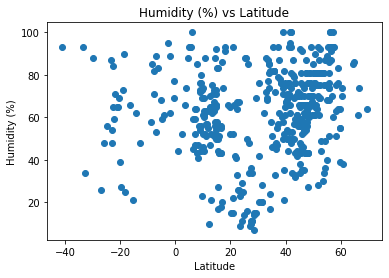

In [30]:
#Humidity (%) vs. Latitude scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Humidity (%)'])
plt.xlabel('Latitude'), plt.ylabel('Humidity (%)'), plt.title("Humidity (%) vs Latitude")
print("Using this plot, we can see that the closer you get towards the Equator, it gets less humid.")
plt.savefig("Images/HumidLatScatter.png")

Using this plot, there does not seem to be a relationship between cloudiness and latitude.


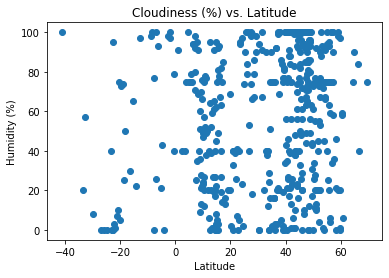

In [33]:
#Cloudiness (%) vs. Latitude Scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Cloudiness (%)'])
plt.xlabel('Latitude'), plt.ylabel('Humidity (%)'), plt.title('Cloudiness (%) vs. Latitude')
print("Using this plot, there does not seem to be a relationship between cloudiness and latitude.")
plt.savefig("Images/CloudLatScatter.png")

Using this plot, we can see that the closer you get towards the Equator, wind speeds get lower.


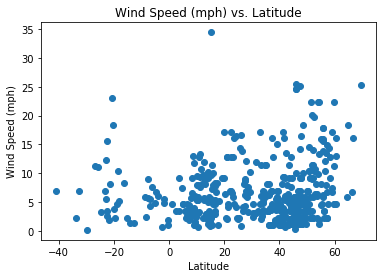

In [32]:
#Wind Speed (mph) vs. Latitude Scatter
plt.scatter(cities_sample['Latitude'], cities_sample['Wind Speed (mph)'])
plt.xlabel('Latitude'), plt.ylabel('Wind Speed (mph)'), plt.title('Wind Speed (mph) vs. Latitude')
print("Using this plot, we can see that the closer you get towards the Equator, wind speeds get lower.")
plt.savefig("Images/WindLatScatter.png")

In [18]:
#define linear regression function
north_hemi = cities_sample.loc[cities_sample['Latitude'] >= 0 ]
south_hemi = cities_sample.loc[cities_sample['Latitude'] < 0]

def linear_plot(x, y, x_label, y_label, title_name):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    line_regress = x * slope + intercept
    plt.scatter(x, y)
    plt.plot(x, line_regress, "r-")
    plt.xlabel(x_label), plt.ylabel(y_label), plt.title(title_name)

north_hemi.info()
south_hemi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 17192 to 4912
Data columns (total 8 columns):
Country             425 non-null object
City                425 non-null object
Latitude            425 non-null float64
Longitude           425 non-null float64
Temperature (F)     425 non-null float64
Humidity (%)        425 non-null float64
Cloudiness (%)      425 non-null float64
Wind Speed (mph)    425 non-null float64
dtypes: float64(6), object(2)
memory usage: 29.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 26765 to 2207
Data columns (total 8 columns):
Country             41 non-null object
City                41 non-null object
Latitude            41 non-null float64
Longitude           41 non-null float64
Temperature (F)     41 non-null float64
Humidity (%)        41 non-null float64
Cloudiness (%)      41 non-null float64
Wind Speed (mph)    41 non-null float64
dtypes: float64(6), object(2)
memory usage: 2.9+ KB


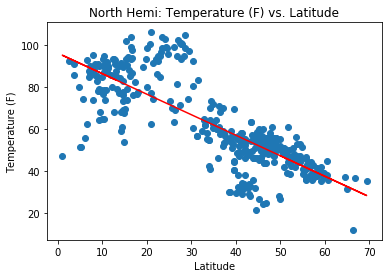

In [41]:
#Northern Hemisphere - Temperature (F) vs. Latitude linear
linear_plot(north_hemi['Latitude'], north_hemi['Temperature (F)'], 'Latitude', 'Temperature (F)', 'North Hemi: Temperature (F) vs. Latitude')


Naturally on both hemispheres, going closer to the equator means higher temperatures.


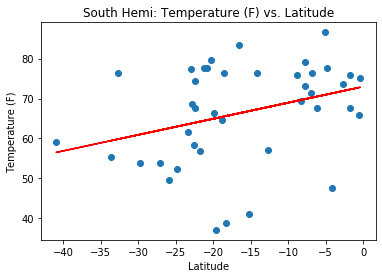

In [42]:
#Southern Hemisphere - Temperature (F) vs. Latitude linear
linear_plot(south_hemi['Latitude'], south_hemi['Temperature (F)'], 'Latitude', 'Temperature (F)', 'South Hemi: Temperature (F) vs. Latitude')

print(f'Naturally on both hemispheres, going closer to the equator means higher temperatures.')

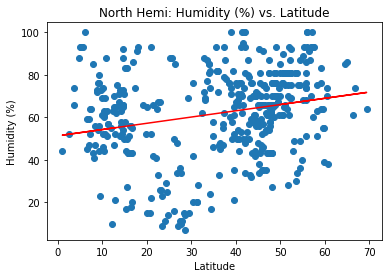

In [43]:
#Northern Hemisphere - Humidity (%) vs. Latitude
linear_plot(north_hemi['Latitude'], north_hemi['Humidity (%)'], 'Latitude', 'Humidity (%)', 'North Hemi: Humidity (%) vs. Latitude')


Humidity in general seems to, on average, slowly increase the more north you get.


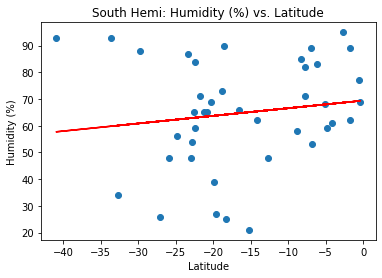

In [44]:
#South Hemi- Humidity (%) vs Latitude
linear_plot(south_hemi['Latitude'], south_hemi['Humidity (%)'], 'Latitude', 'Humidity (%)', 'South Hemi: Humidity (%) vs. Latitude')

print(f'Humidity in general seems to, on average, slowly increase the more north you get.')

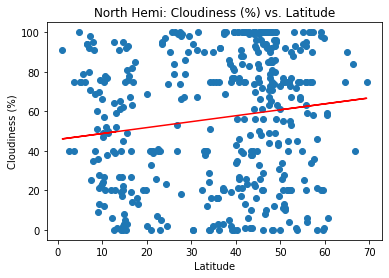

In [45]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
linear_plot(north_hemi['Latitude'], north_hemi['Cloudiness (%)'], 'Latitude', 'Cloudiness (%)', 'North Hemi: Cloudiness (%) vs. Latitude')

While previously there seemed to be no relation, as we go further south, there are lower Cloud percentages.


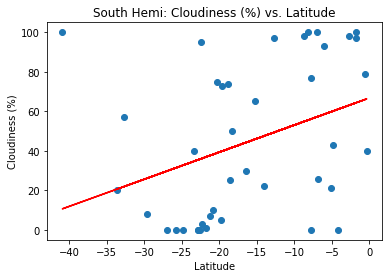

In [46]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
linear_plot(south_hemi['Latitude'], south_hemi['Cloudiness (%)'], 'Latitude', 'Cloudiness (%)', 'South Hemi: Cloudiness (%) vs. Latitude')
print(f'While previously there seemed to be no relation, as we go further south, there are lower Cloud percentages.')

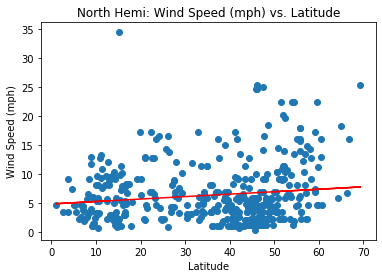

In [47]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
linear_plot(north_hemi['Latitude'], north_hemi['Wind Speed (mph)'], 'Latitude', 'Wind Speed (mph)', 'North Hemi: Wind Speed (mph) vs. Latitude')

Based on these plots, the further south or north you go, the higher wind speeds you will encounter


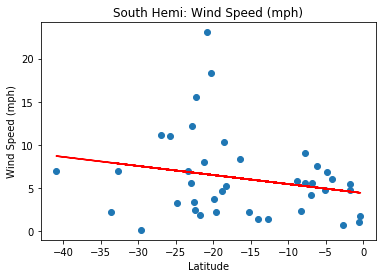

In [49]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
linear_plot(south_hemi['Latitude'], south_hemi['Wind Speed (mph)'], 'Latitude', 'Wind Speed (mph)', 'South Hemi: Wind Speed (mph)')
print(f'Based on these plots, the further south or north you go, the higher wind speeds you will encounter')